# <u>Machine Learning models for beer review score classification </u> 
#### Author: Eduardo Szagadyn

In this notebook we will explore the craft beer market using a dataset that combines technical data, organoleptic indicators (calculated with reviews word occurence) and the average review score for every product. Review data was obtained from user entries made in the webpage https://www.beeradvocate.com/

We will study this topic by building several multiclass classification models.The main idea is to predict if a beer will be bad (0), average (1) or good (2) using that beer's technical and organoleptic data. Organoleptic properties are the aspects of food, water or other substances that create an individual experience via the senses—including taste, sight, smell, and touch.

The dataset used in this notebook can be obtained from https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set

#### <u>Dataset Information:</u>

The main data set contains the following columns:

#### **Beer Data**

1  Name: Beer name.

2  Style: Beer Style.

3  Brewery: Brewery name.

4  Beer Name Full: Complete beer name Brewery + Brew Name unique identifier for each beer.

5  Description: Notes on the beer if available.


#### **Chemical Properties**

6  ABV: Alcohol content of beer percentage by volume.

7  Min IBU: The minimum IBU value each beer can possess. IBU was not a value available for each beer, but the IBU range for each style was.

8  Max IBU: The maximum IBU value each beer can possess. IBU was not a value available for each beer, but the IBU range for each style was.

#### **Organoleptic Properties**

The next eleven columns represent the tasting profile features of the beer, and are defined by word counts found in up to 25 reviews of each beer. 
The assumption is that people writing reviews are more than likely describing what they do experience rather than what they do not.


##### **Mouthfeel**

9  Astringency

10  Body

11  Alcohol


##### **Taste**

12  Bitter

13  Sweet

14  Sour

15  Salty


##### **Flavor And Aroma**

16  Fruits

17  Hoppy

18  Spices

19  Malty


#### **Review Data**

The last six columns contain information from beer reviews--they include the number (count) of consumer/user reviews, the average overall rating score,
and the average rating scores for the aroma, appearance, palate, and taste of each individual beer.

20  review_aroma

21  review_appearance

22  review_palate

23  review_taste

24  review_overall

25  number_of_reviews


* Dataset reading and preliminary data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
sns.reset_defaults()

In [45]:
# Uncomment to install kaggle API and unzip command
# Remember to generate API token on Kaggle website and save it to .kaggle folder in your home directory

"""
! conda install -c conda-forge kaggle --y
"""

# Uncomment to install unzip command line tools (only for unix-like systems)

"""
! conda install -c conda-forge p7zip --y
"""

'\n! conda install -c conda-forge p7zip --y\n'

In [3]:
! kaggle datasets download -d ruthgn/beer-profile-and-ratings-data-set

100%|████████████████████████████████████████| 492k/492k [00:00<00:00, 4.34MB/s]
100%|████████████████████████████████████████| 492k/492k [00:00<00:00, 4.32MB/s]


In [4]:
! 7za e beer-profile-and-ratings-data-set.zip "beer_profile_and_ratings.csv" -y

# Optional: remove downloaded zip file to save space

"""
! rm beer-profile-and-ratings-data-set.zip
"""


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=es_AR.UTF-8,Utf16=on,HugeFiles=on,64 bits,6 CPUs AMD Ryzen 5 4500U with Radeon Graphics          (860F01),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 504214 bytes (493 KiB)

Extracting archive: beer-profile-and-ratings-data-set.zip
--
Path = beer-profile-and-ratings-data-set.zip
Type = zip
Physical Size = 504214

    Everything is Ok

Size:       1249676
Compressed: 504214


'\n! rm beer-profile-and-ratings-data-set.zip\n'

In [5]:
df = pd.read_csv('beer_profile_and_ratings.csv')

In [6]:
df.head(2)

Name    Style                 Brewery  \
0       Amber  Altbier     Alaskan Brewing Co.   
1  Double Bag  Altbier  Long Trail Brewing Co.   

                    Beer Name (Full)  \
0  Alaskan Brewing Co. Alaskan Amber   
1  Long Trail Brewing Co. Double Bag   

                                         Description  ABV  Min IBU  Max IBU  \
0  Notes:Richly malty and long on the palate, wit...  5.3       25       50   
1  Notes:This malty, full-bodied double alt is al...  7.2       25       50   

   Astringency  Body  ...  Fruits  Hoppy  Spices  Malty  review_aroma  \
0           13    32  ...      33     57       8    111      3.498994   
1           12    57  ...      24     35      12     84      3.798337   

   review_appearance  review_palate  review_taste  review_overall  \
0           3.636821       3.556338      3.643863        3.847082   
1           3.846154       3.904366      4.024948        4.034304   

   number_of_reviews  
0                497  
1                481  

[2 rows x 25 columns]

In [7]:
df.describe()

ABV      Min IBU      Max IBU  Astringency         Body  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean      6.526688    21.180482    38.986863    16.515796    46.129496   
std       2.546997    13.242242    21.355281    10.410661    25.947842   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000    15.000000    25.000000     9.000000    29.000000   
50%       6.000000    20.000000    35.000000    14.000000    40.000000   
75%       7.600000    25.000000    45.000000    21.000000    58.000000   
max      57.500000    65.000000   100.000000    81.000000   175.000000   

           Alcohol       Bitter        Sweet         Sour        Salty  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean     17.055990    36.364404    58.270879    33.145449     1.017204   
std      17.331334    25.791152    34.281310    35.780172     2.132651   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000    17.000000    33.000000    11.000000     0.000000   
50%      11.000000    31.000000    54.000000    22.000000     0.000000   
75%      22.000000    52.000000    77.000000    42.000000     1.000000   
max     139.000000   150.000000   263.000000   284.000000    48.000000   

            Fruits        Hoppy       Spices        Malty  review_aroma  \
count  3197.000000  3197.000000  3197.000000  3197.000000   3197.000000   
mean     38.529559    40.924617    18.345637    75.330935      3.638789   
std      32.296646    30.403641    23.756582    39.909338      0.503209   
min       0.000000     0.000000     0.000000     0.000000      1.509615   
25%      12.000000    18.000000     4.000000    45.000000      3.422559   
50%      29.000000    33.000000    10.000000    73.000000      3.720183   
75%      60.000000    56.000000    23.000000   103.000000      3.978000   
max     175.000000   172.000000   184.000000   239.000000      5.000000   

       review_appearance  review_palate  review_taste  review_overall  \
count        3197.000000    3197.000000   3197.000000     3197.000000   
mean            3.754393       3.660428      3.702496        3.747522   
std             0.403416       0.449937      0.510361        0.444288   
min             1.571429       1.285714      1.214286        1.136364   
25%             3.604651       3.470021      3.500000        3.566667   
50%             3.833333       3.741667      3.791667        3.830239   
75%             4.000000       3.965587      4.033333        4.032847   
max             4.666667       5.000000      5.000000        5.000000   

       number_of_reviews  
count        3197.000000  
mean          233.284955  
std           361.811847  
min             1.000000  
25%            23.000000  
50%            93.000000  
75%           284.000000  
max          3290.000000

In [8]:
df.dtypes

Name                  object
Style                 object
Brewery               object
Beer Name (Full)      object
Description           object
ABV                  float64
Min IBU                int64
Max IBU                int64
Astringency            int64
Body                   int64
Alcohol                int64
Bitter                 int64
Sweet                  int64
Sour                   int64
Salty                  int64
Fruits                 int64
Hoppy                  int64
Spices                 int64
Malty                  int64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
review_overall       float64
number_of_reviews      int64
dtype: object

In [9]:
#Chequeo los valores de la variable "Style" ya que concentra muchas características del producto.
#Noto que el estilo de la cerveza está muy desagregado.

len((df['Style'].value_counts()))

111

In [10]:
# We check the existence of null values in our dataset.

print("Null values per column:")
print(df.isnull().sum().sort_values(ascending=False))

Null values per column:
number_of_reviews    0
Bitter               0
Style                0
Brewery              0
Beer Name (Full)     0
Description          0
ABV                  0
Min IBU              0
Max IBU              0
Astringency          0
Body                 0
Alcohol              0
Sweet                0
review_overall       0
Sour                 0
Salty                0
Fruits               0
Hoppy                0
Spices               0
Malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
Name                 0
dtype: int64


In [11]:
# We check for extreme values of variable 'number_of_reviews'

# The occurence of low values could create distrortions in our analysis,
# this is because up to 25 reviews are included in each row or product to 
# perform the word count that will help us account for organoleptic features
# of each beer. So rows generated with too few reviews (<25) could be problematic.

df['number_of_reviews'].sort_values(ascending=True).head(5)

1420    1
1980    1
2334    1
2328    1
2897    1
Name: number_of_reviews, dtype: int64

In [12]:
# We check for extreme values of variable 'number_of_reviews'

# The occurence of high values will not create distrortions in our analysis,
# this is because up to 25 reviews are included in each row or product.

df['number_of_reviews'].sort_values(ascending=False).head(5)

924     3290
803     3000
955     2704
925     2527
2658    2502
Name: number_of_reviews, dtype: int64

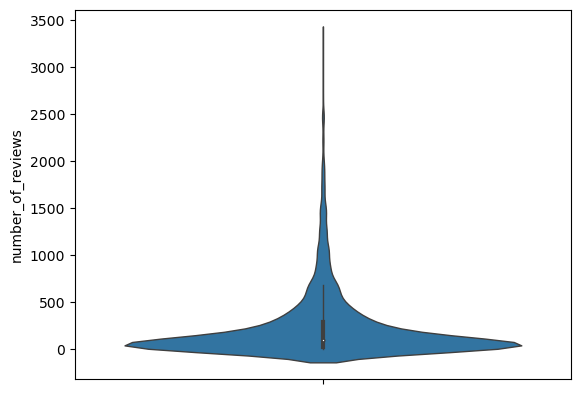

In [13]:
# We check the quantity of reviews included in every product listed in the dataset

sns.violinplot(y=df['number_of_reviews'], linewidth=1.0)
plt.show()

In [14]:
# Since word count for every feature is computed with up to 25 reviews, 
# we eliminate rows with less than 25 reviews to avoid artificially low word counts.

mascara_bajos_reviews = df['number_of_reviews'] > 24
df.loc[mascara_bajos_reviews].shape

(2363, 25)

In [15]:
# We apply the mask to the original dataset

df = df[mascara_bajos_reviews]

In [16]:
# Descriptive statistics of our candidate for target variable

df['review_overall'].describe()

count    2363.000000
mean        3.762845
std         0.411165
min         1.471154
25%         3.607143
50%         3.839367
75%         4.031810
max         4.634615
Name: review_overall, dtype: float64

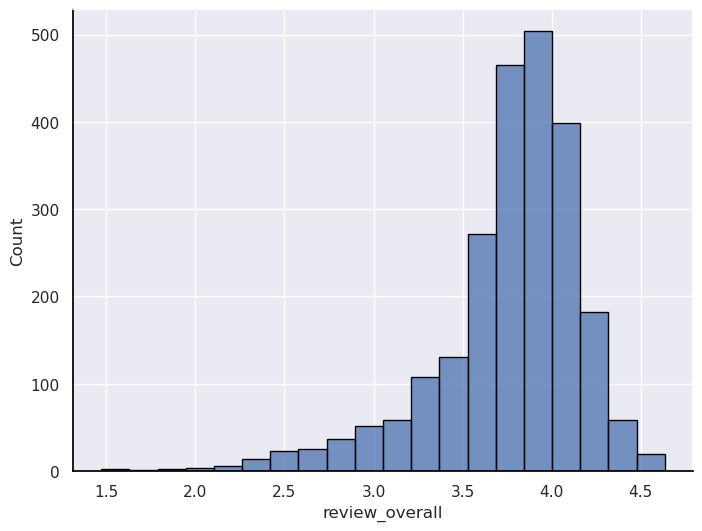

In [17]:
# We generate an histogram of the candidate for target variable to check its distribution

sns.set(rc={'figure.figsize':(8,6)})
ax = sns.histplot(data=df, x="review_overall", bins=20, edgecolor='black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
plt.show()

In [18]:
df.shape

(2363, 25)

In [19]:
# We check for the beer styles that received better overall scores.

df.groupby('Style').mean().loc[:,['review_overall']].sort_values(by='review_overall', ascending=False).head(15)

review_overall
Style                                           
IPA - New England                       4.497061
Wild Ale                                4.186698
Stout - American Imperial               4.163934
IPA - American                          4.118649
IPA - Imperial                          4.103819
Lager - Kellerbier / Zwickelbier        4.101492
Stout - Russian Imperial                4.100748
Lambic - Traditional                    4.096229
Pale Ale - American                     4.069354
Farmhouse Ale - Saison                  4.054091
Porter - Imperial                       4.039082
Brett Beer                              4.034746
Lambic - Gueuze                         4.030105
Stout - Oatmeal                         4.012790
Sour - Flanders Red Ale                 3.995910

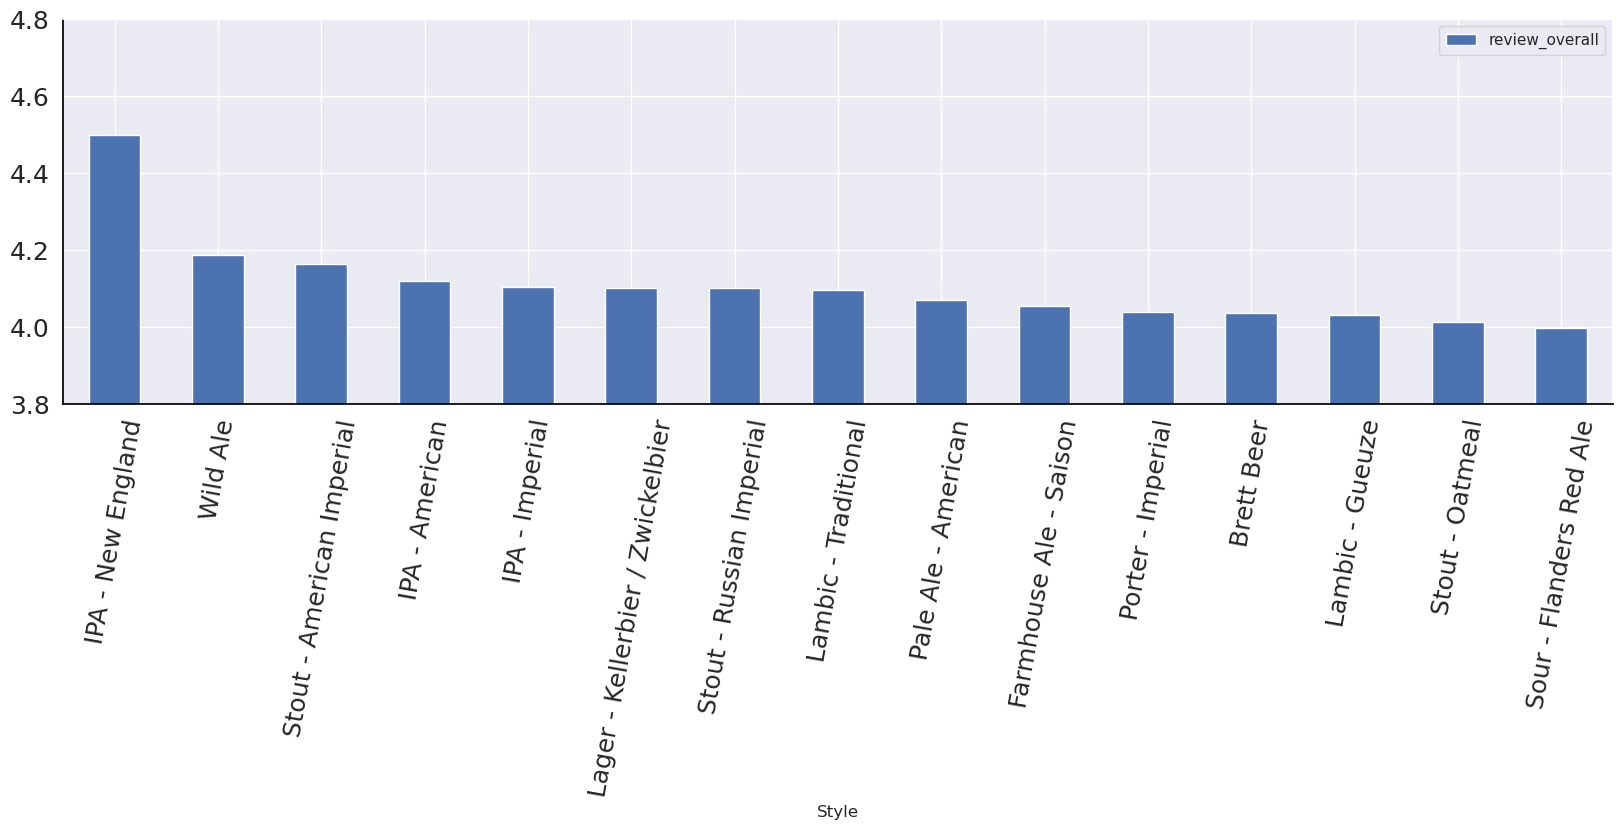

In [20]:
# We graph the overall score grouped by beer style.

ax = df.groupby('Style').mean().loc[:,['review_overall']].sort_values(by='review_overall', ascending=False).head(15).plot.bar(figsize=(20,5), ylim=(3.8,4.8), fontsize=18, rot=80)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
plt.show()
print()

* We analyze the distribution of the features that we will use and their correlation with the target variable

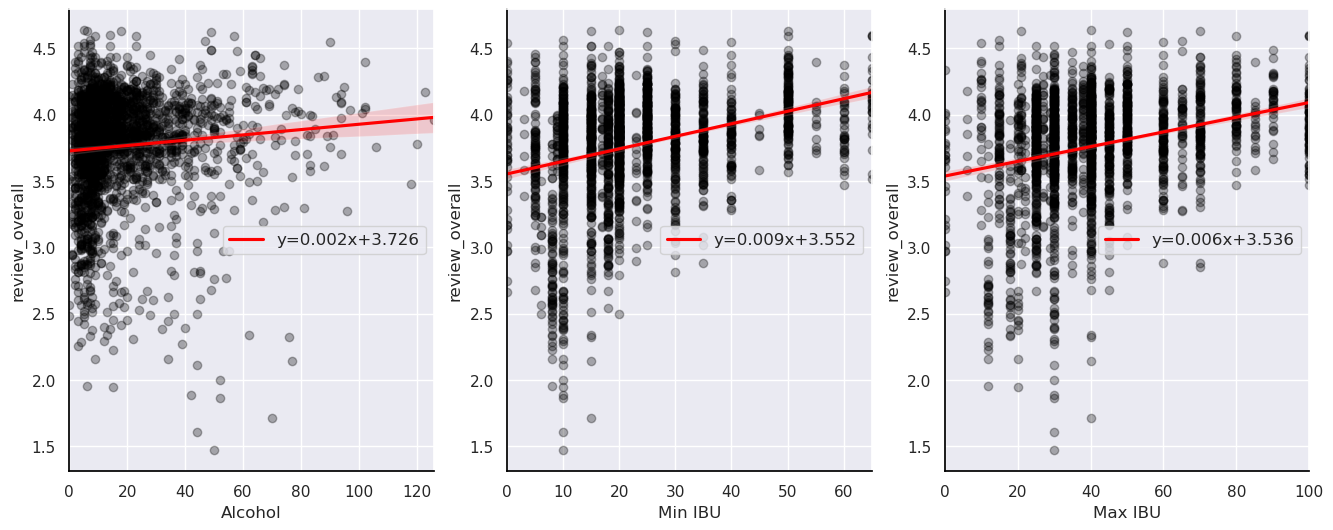

In [21]:
plt.figure(figsize=(16, 6)) 

plt.subplot(1, 3, 1)
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df["Alcohol"],y=df["review_overall"])
ax1 = sns.regplot(x=df["Alcohol"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)}, scatter_kws={"color": "black", 'alpha': 0.3})
ax1.legend(fontsize=12, loc='center right')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')

plt.subplot(1, 3, 2)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x=df["Min IBU"],y=df["review_overall"])
ax2 = sns.regplot(x=df["Min IBU"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope2,intercept2)}, scatter_kws={"color": "black", 'alpha': 0.3})
ax2.legend(fontsize=12, loc='center right')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')

plt.subplot(1, 3, 3)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x=df["Max IBU"],y=df["review_overall"])
ax2 = sns.regplot(x=df["Max IBU"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope3,intercept3)}, scatter_kws={"color": "black", 'alpha': 0.3})
ax2.legend(fontsize=12, loc='center right')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')

plt.show()


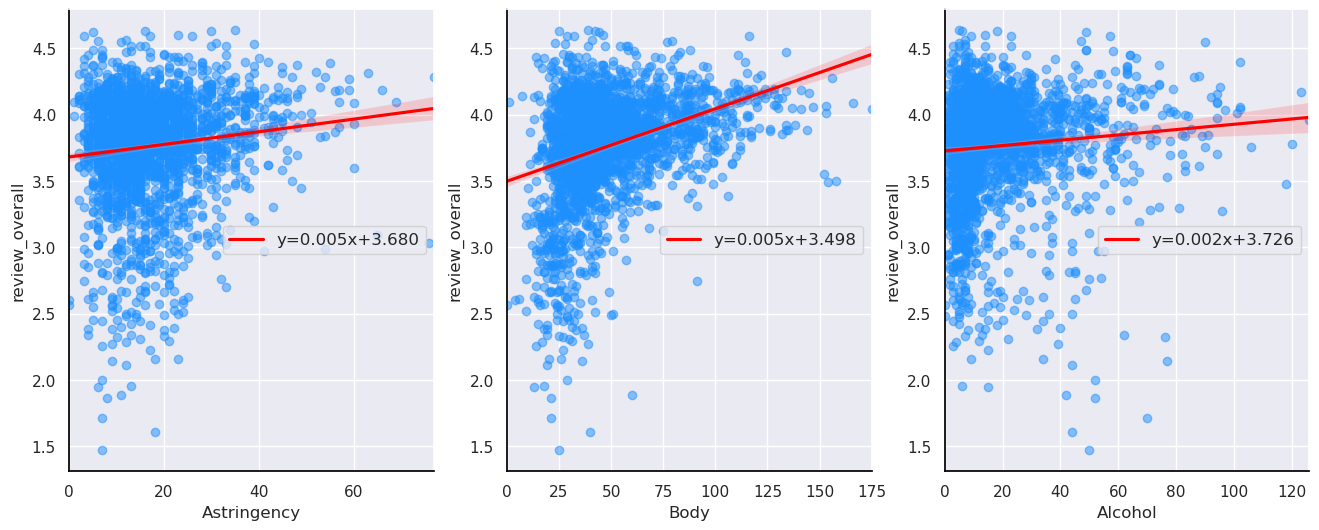

In [22]:
plt.figure(figsize=(16, 6)) 

plt.subplot(1, 3, 1)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x=df["Astringency"],y=df["review_overall"])
ax1 = sns.regplot(x=df["Astringency"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope1,intercept1)}, scatter_kws={"color": "dodgerblue", 'alpha': 0.5})
ax1.legend(fontsize=12, loc='center right')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')

plt.subplot(1, 3, 2)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x=df["Body"],y=df["review_overall"])
ax2 = sns.regplot(x=df["Body"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope2,intercept2)}, scatter_kws={"color": "dodgerblue", 'alpha': 0.5})
ax2.legend(fontsize=12, loc='center right')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')

plt.subplot(1, 3, 3)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x=df["Alcohol"],y=df["review_overall"])
ax3 = sns.regplot(x=df["Alcohol"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope3,intercept3)}, scatter_kws={"color": "dodgerblue", 'alpha': 0.5})
ax3.legend(fontsize=12, loc='center right')
ax3.spines['bottom'].set_color('black')
ax3.spines['left'].set_color('black')

plt.show()

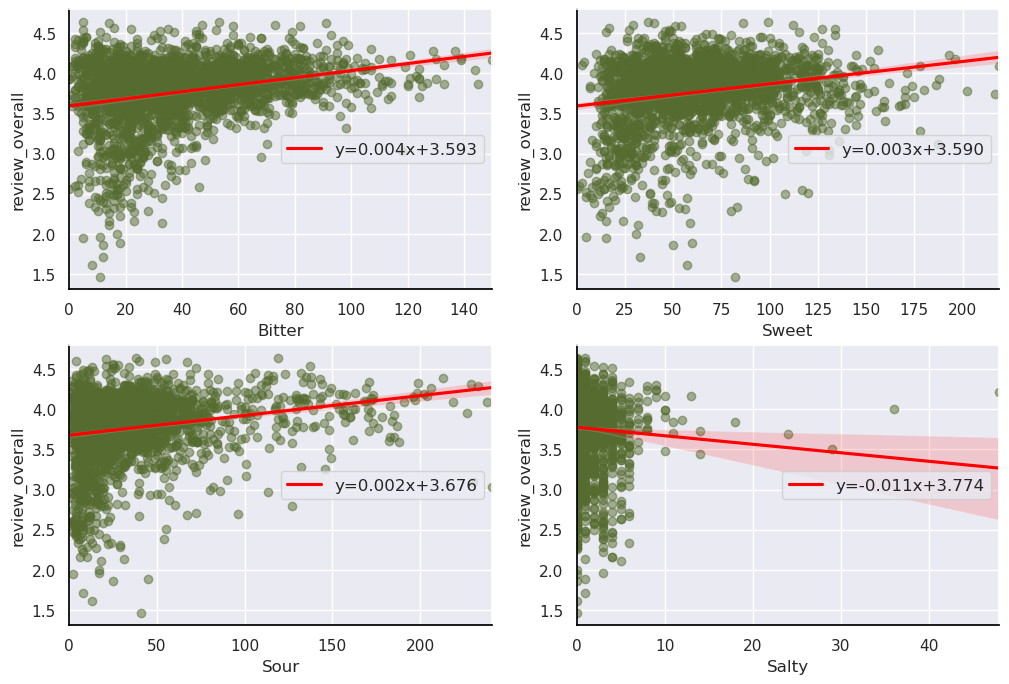

In [23]:
plt.figure(figsize=(12, 8)) 

plt.subplot(2, 2, 1)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x=df["Bitter"],y=df["review_overall"])
ax1 = sns.regplot(x=df["Bitter"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope1,intercept1)}, scatter_kws={"color": "darkolivegreen", 'alpha': 0.5})
ax1.legend(fontsize=12, loc='center right')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')

plt.subplot(2, 2, 2)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x=df["Sweet"],y=df["review_overall"])
ax2 = sns.regplot(x=df["Sweet"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope2,intercept2)}, scatter_kws={"color": "darkolivegreen", 'alpha': 0.5})
ax2.legend(fontsize=12, loc='center right')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')

plt.subplot(2, 2, 3)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x=df["Sour"],y=df["review_overall"])
ax3 = sns.regplot(x=df["Sour"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope3,intercept3)}, scatter_kws={"color": "darkolivegreen", 'alpha': 0.5})
ax3.legend(fontsize=12, loc='center right')
ax3.spines['bottom'].set_color('black')
ax3.spines['left'].set_color('black')

plt.subplot(2, 2, 4)
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(x=df["Salty"],y=df["review_overall"])
ax4 = sns.regplot(x=df["Salty"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope4,intercept4)}, scatter_kws={"color": "darkolivegreen", 'alpha': 0.5})
ax4.legend(fontsize=12, loc='center right')
ax4.spines['bottom'].set_color('black')
ax4.spines['left'].set_color('black')

plt.show()

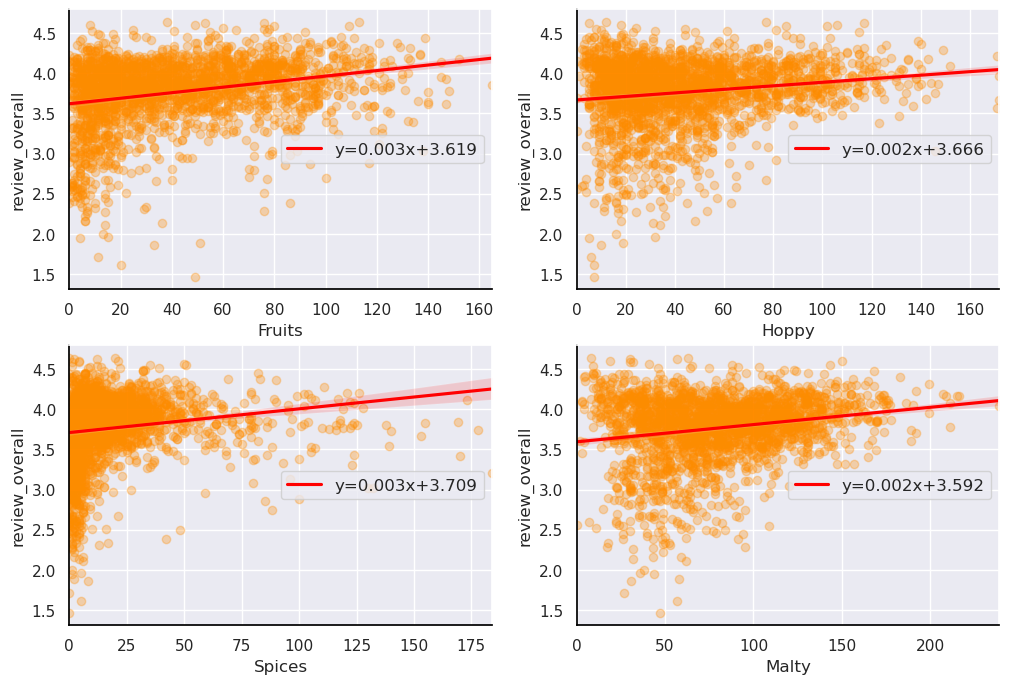

In [24]:
plt.figure(figsize=(12, 8)) 

plt.subplot(2, 2, 1)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x=df["Fruits"],y=df["review_overall"])
ax1 = sns.regplot(x=df["Fruits"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope1,intercept1)}, scatter_kws={"color": "darkorange", 'alpha': 0.3})
ax1.legend(fontsize=12, loc='center right')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')

plt.subplot(2, 2, 2)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x=df["Hoppy"],y=df["review_overall"])
ax2 = sns.regplot(x=df["Hoppy"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope2,intercept2)}, scatter_kws={"color": "darkorange", 'alpha': 0.3})
ax2.legend(fontsize=12, loc='center right')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')

plt.subplot(2, 2, 3)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x=df["Spices"],y=df["review_overall"])
ax3 = sns.regplot(x=df["Spices"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope3,intercept3)}, scatter_kws={"color": "darkorange", 'alpha': 0.3})
ax3.legend(fontsize=12, loc='center right')
ax3.spines['bottom'].set_color('black')
ax3.spines['left'].set_color('black')

plt.subplot(2, 2, 4)
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(x=df["Malty"],y=df["review_overall"])
ax4 = sns.regplot(x=df["Malty"], y=df["review_overall"], line_kws={"color": "red", 'label':"y={0:.3f}x+{1:.3f}".format(slope4,intercept4)}, scatter_kws={"color": "darkorange", 'alpha': 0.3})
ax4.legend(fontsize=12, loc='center right')
ax4.spines['bottom'].set_color('black')
ax4.spines['left'].set_color('black')

plt.show()


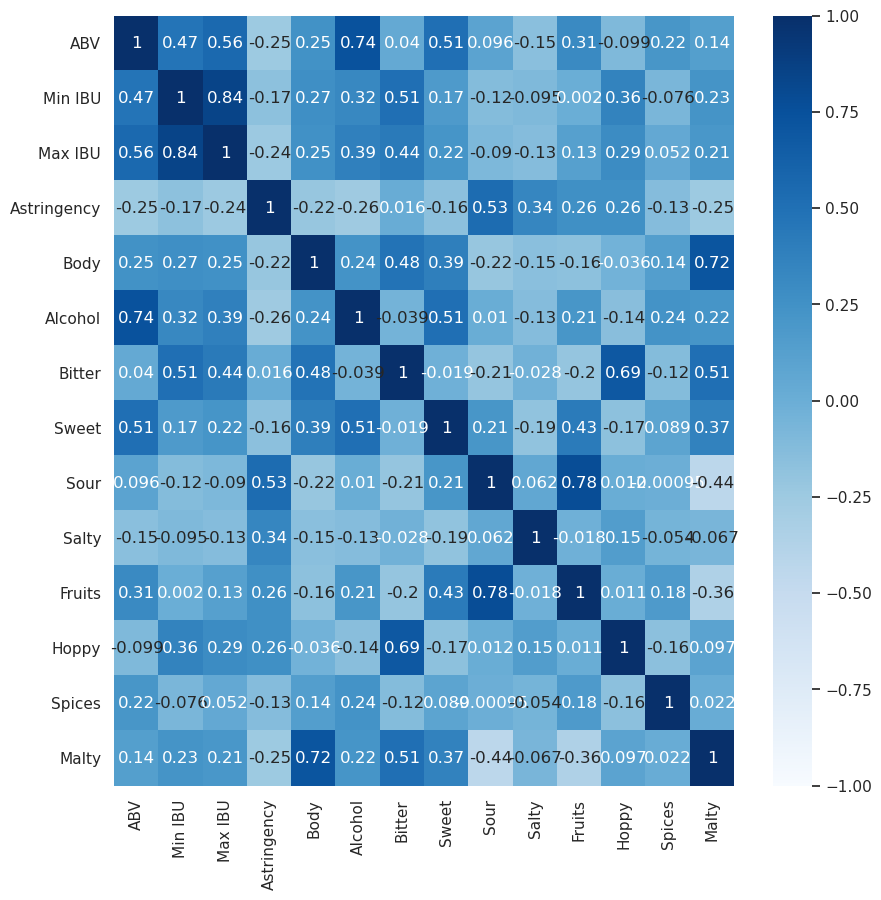

In [25]:
# Since part of the analysis involves regressions we check for colinearity of numeric variables

X_cont = df[['ABV',
 'Min IBU',
 'Max IBU',
 'Astringency',
 'Body',
 'Alcohol',
 'Bitter',
 'Sweet',
 'Sour',
 'Salty',
 'Fruits',
 'Hoppy',
 'Spices',
 'Malty']]

plt.figure(figsize=(10,10))
sns.heatmap(X_cont.corr(), annot=True, vmin=-1, cmap='Blues')
plt.show()

In [69]:
# We generate dummy variables for every beer style in the dataset, dropping the first to avoid increased variance of estimators.

df = pd.get_dummies(df, columns=['Style'], drop_first=True)

In [70]:
df.head(2)

Name                 Brewery                   Beer Name (Full)  \
0       Amber     Alaskan Brewing Co.  Alaskan Brewing Co. Alaskan Amber   
1  Double Bag  Long Trail Brewing Co.  Long Trail Brewing Co. Double Bag   

                                         Description  ABV  Min IBU  Max IBU  \
0  Notes:Richly malty and long on the palate, wit...  5.3       25       50   
1  Notes:This malty, full-bodied double alt is al...  7.2       25       50   

   Astringency  Body  Alcohol  ...  Style_Tripel  \
0           13    32        9  ...             0   
1           12    57       18  ...             0   

   Style_Wheat Beer - American Dark  Style_Wheat Beer - American Pale  \
0                                 0                                 0   
1                                 0                                 0   

   Style_Wheat Beer - Dunkelweizen  Style_Wheat Beer - Hefeweizen  \
0                                0                              0   
1                                0                              0   

   Style_Wheat Beer - Kristallweizen  Style_Wheat Beer - Wheatwine  \
0                                  0                             0   
1                                  0                             0   

   Style_Wheat Beer - Witbier  Style_Wild Ale  Style_Winter Warmer  
0                           0               0                    0  
1                           0               0                    0  

[2 rows x 134 columns]

In [71]:
df.shape

(2363, 134)

In [72]:
list(df.columns)

['Name',
 'Brewery',
 'Beer Name (Full)',
 'Description',
 'ABV',
 'Min IBU',
 'Max IBU',
 'Astringency',
 'Body',
 'Alcohol',
 'Bitter',
 'Sweet',
 'Sour',
 'Salty',
 'Fruits',
 'Hoppy',
 'Spices',
 'Malty',
 'review_aroma',
 'review_appearance',
 'review_palate',
 'review_taste',
 'review_overall',
 'number_of_reviews',
 'Style_Barleywine - American',
 'Style_Barleywine - English',
 'Style_Bitter - English',
 'Style_Bitter - English Extra Special / Strong Bitter (ESB)',
 'Style_Bière de Champagne / Bière Brut',
 'Style_Blonde Ale - American',
 'Style_Blonde Ale - Belgian',
 'Style_Bock - Doppelbock',
 'Style_Bock - Eisbock',
 'Style_Bock - Maibock',
 'Style_Bock - Traditional',
 'Style_Bock - Weizenbock',
 'Style_Braggot',
 'Style_Brett Beer',
 'Style_Brown Ale - American',
 'Style_Brown Ale - Belgian Dark',
 'Style_Brown Ale - English',
 'Style_California Common / Steam Beer',
 'Style_Chile Beer',
 'Style_Cream Ale',
 'Style_Dubbel',
 'Style_Farmhouse Ale - Bière de Garde',
 'Style_

In [73]:
# We will map the scores into three categories to transform this analysis into a classification problem

# We define the mapping function to apply to the score column, we will use three categories creating an imbalanced dataset:

def remapping(score):
    if score  <= 2.0:
        return 0
    elif score > 2.0 and score <= 3.0:
        return 1
    elif score > 3.0:
        return 2


# We apply the mapping function to the variable to be used as target:

df['review_overall'] = df['review_overall'].apply(remapping)

In [74]:
# We check for data integrity and the resulting score distribution.

df['review_overall'].value_counts()

2    2219
1     136
0       8
Name: review_overall, dtype: int64

In [75]:
# We generate a feature list including dummy variables for every beer style and the target variable review_overall

X = df[['ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty', 'Style_Barleywine - American', 'Style_Barleywine - English', 'Style_Bitter - English', 
 'Style_Bitter - English Extra Special / Strong Bitter (ESB)', 'Style_Bière de Champagne / Bière Brut', 'Style_Blonde Ale - American', 'Style_Blonde Ale - Belgian', 'Style_Bock - Doppelbock', 'Style_Bock - Eisbock', 
 'Style_Bock - Maibock', 'Style_Bock - Traditional', 'Style_Bock - Weizenbock', 'Style_Braggot', 'Style_Brett Beer', 'Style_Brown Ale - American', 'Style_Brown Ale - Belgian Dark', 'Style_Brown Ale - English', 'Style_California Common / Steam Beer', 
 'Style_Chile Beer', 'Style_Cream Ale', 'Style_Dubbel', 'Style_Farmhouse Ale - Bière de Garde', 'Style_Farmhouse Ale - Sahti', 'Style_Farmhouse Ale - Saison', 'Style_Fruit and Field Beer', 'Style_Gruit / Ancient Herbed Ale', 'Style_Happoshu',     
 'Style_Herb and Spice Beer', 'Style_IPA - American', 'Style_IPA - Belgian', 'Style_IPA - Black / Cascadian Dark Ale', 'Style_IPA - English', 'Style_IPA - Imperial', 'Style_IPA - New England', 'Style_Kvass', 'Style_Kölsch', 
 'Style_Lager - Adjunct', 'Style_Lager - American', 'Style_Lager - American Amber / Red', 'Style_Lager - European / Dortmunder Export', 'Style_Lager - European Dark', 'Style_Lager - European Pale', 'Style_Lager - European Strong', 'Style_Lager - Helles',      
 'Style_Lager - India Pale Lager (IPL)', 'Style_Lager - Japanese Rice', 'Style_Lager - Kellerbier / Zwickelbier', 'Style_Lager - Light', 'Style_Lager - Malt Liquor', 'Style_Lager - Munich Dunkel', 'Style_Lager - Märzen / Oktoberfest', 
 'Style_Lager - Rauchbier', 'Style_Lager - Schwarzbier', 'Style_Lager - Vienna', 'Style_Lambic - Faro', 'Style_Lambic - Fruit', 'Style_Lambic - Gueuze', 'Style_Lambic - Traditional', 'Style_Low Alcohol Beer', 'Style_Mild Ale - English Dark', 
 'Style_Mild Ale - English Pale', 'Style_Old Ale', 'Style_Pale Ale - American', 'Style_Pale Ale - Belgian', 'Style_Pale Ale - English', 'Style_Pilsner - Bohemian / Czech', 'Style_Pilsner - German', 'Style_Pilsner - Imperial', 'Style_Porter - American', 
 'Style_Porter - Baltic', 'Style_Porter - English', 'Style_Porter - Imperial', 'Style_Porter - Robust', 'Style_Porter - Smoked', 'Style_Pumpkin Beer', 'Style_Quadrupel (Quad)', 'Style_Red Ale - American Amber / Red', 'Style_Red Ale - Imperial', 
 'Style_Red Ale - Irish', 'Style_Rye Beer', 'Style_Rye Beer - Roggenbier', 'Style_Scotch Ale / Wee Heavy', 'Style_Scottish Ale', 'Style_Smoked Beer', 'Style_Sour - Berliner Weisse', 'Style_Sour - Flanders Oud Bruin', 'Style_Sour - Flanders Red Ale', 
 'Style_Sour - Gose', 'Style_Stout - American', 'Style_Stout - American Imperial', 'Style_Stout - English', 'Style_Stout - Foreign / Export', 'Style_Stout - Irish Dry', 'Style_Stout - Oatmeal', 'Style_Stout - Russian Imperial', 'Style_Stout - Sweet / Milk', 
 'Style_Strong Ale - American', 'Style_Strong Ale - Belgian Dark', 'Style_Strong Ale - Belgian Pale', 'Style_Strong Ale - English', 'Style_Tripel', 'Style_Wheat Beer - American Dark', 'Style_Wheat Beer - American Pale', 'Style_Wheat Beer - Dunkelweizen', 
 'Style_Wheat Beer - Hefeweizen', 'Style_Wheat Beer - Kristallweizen', 'Style_Wheat Beer - Wheatwine', 'Style_Wheat Beer - Witbier', 'Style_Wild Ale', 'Style_Winter Warmer']]

y = df["review_overall"]

* ### Split Train y Test

In [76]:
# We separate the dataset into train and test 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12, test_size=0.2, shuffle=True)

In [77]:
# Uncomment to install imbalanced learning package

"""
! conda install -c conda-forge imbalanced-learn --y
"""

'\n! conda install -c conda-forge imbalanced-learn --y\n'

In [78]:
# We apply an oversampling process to the training dataset

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

oversampler=RandomOverSampler(sampling_strategy='auto', random_state=123)

X_train,y_train=oversampler.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After', counter)

Before Counter({2: 1775, 1: 109, 0: 6})
After Counter({2: 1775, 1: 1775, 0: 1775})


In [79]:
# We scale the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
X_train_scaled.shape

(5325, 124)

In [81]:
y_train.value_counts()

2    1775
1    1775
0    1775
Name: review_overall, dtype: int64

In [82]:
y_test.value_counts()

2    444
1     27
0      2
Name: review_overall, dtype: int64

* ### Machine Learning Models

Naive Bayes

In [83]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB()
clf.fit(X_train, y_train)

ComplementNB()

In [84]:
y_test_pred = clf.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.8583509513742071

In [86]:
from sklearn.metrics import classification_report

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, y_test_pred, target_names=target_names, zero_division=1))

              precision    recall  f1-score   support

     class 0       0.02      0.50      0.04         2
     class 1       0.47      0.56      0.51        27
     class 2       0.98      0.88      0.93       444

    accuracy                           0.86       473
   macro avg       0.49      0.64      0.49       473
weighted avg       0.95      0.86      0.90       473



Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter = 5000)

logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000)

In [88]:
y_test_pred = logistic_regression.predict(X_test_scaled)

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[  0,   2,   0],
       [  2,  23,   2],
       [  3,  42, 399]])

In [90]:
# We calculate model accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.8921775898520085

In [91]:
# We calculate the recall of each class

from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred, average=None)

array([0.        , 0.85185185, 0.89864865])

In [92]:
# We calculate the precission of each class

from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred, average=None)

array([0.        , 0.34328358, 0.99501247])

In [93]:
# We calculate the hybrid F1 metric of each class, combining precision and recall in one score

from sklearn.metrics import f1_score

print(f1_score(y_test, y_test_pred, average=None))

[0.        0.4893617 0.9443787]


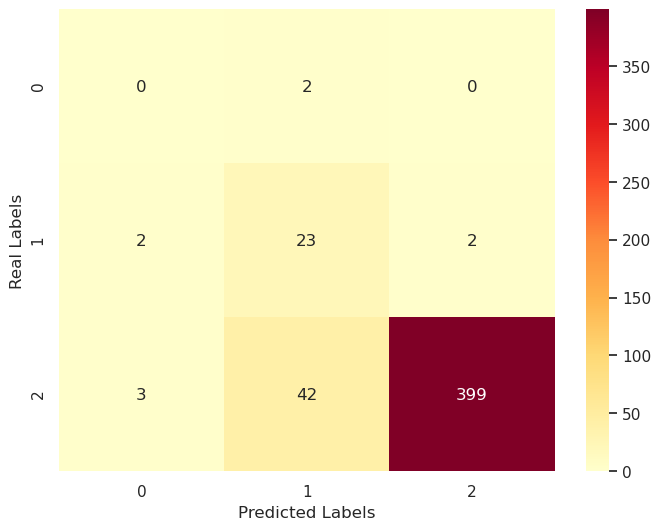

In [94]:
confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f', cmap='YlOrRd',  xticklabels=[0,1,2],  yticklabels=[0,1,2] )
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [95]:
from sklearn.metrics import classification_report

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, y_test_pred, target_names=target_names, zero_division=1))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         2
     class 1       0.34      0.85      0.49        27
     class 2       1.00      0.90      0.94       444

    accuracy                           0.89       473
   macro avg       0.45      0.58      0.48       473
weighted avg       0.95      0.89      0.91       473



In [ ]:
# Hyperparameter tuning with Gridsearch

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
penalty = ['l2', None]
solvers = ['lbfgs', 'sag', 'saga']
multiclass = ['multinomial']
classweight = ['balanced', None]
maxiter = [5000]

grid = dict(solver=solvers, penalty=penalty , multi_class=multiclass, max_iter=maxiter) #, class_weight=classweight

grid_search = GridSearchCV(estimator=logistic_regression, param_grid=grid, n_jobs=-1, cv=folds, scoring='accuracy',error_score=0, verbose=0)
grid_search.fit(X_train_scaled, y_train)


In [97]:
y_pred_grid = grid_search.predict(X_test_scaled)
print(classification_report(y_test, y_pred_grid, zero_division=1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.34      0.85      0.49        27
           2       1.00      0.90      0.94       444

    accuracy                           0.89       473
   macro avg       0.45      0.58      0.48       473
weighted avg       0.95      0.89      0.91       473



In [98]:
grid_search.best_estimator_

LogisticRegression(max_iter=5000, multi_class='multinomial')

In [99]:
# We instantiate the model with the parameters obtained from the grid search


logistic_regression_best = grid_search.best_estimator_

logistic_regression_best.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000, multi_class='multinomial')

In [100]:
y_test_pred = logistic_regression_best.predict(X_test_scaled)

target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, y_test_pred, target_names=target_names, zero_division=1))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         2
     class 1       0.34      0.85      0.49        27
     class 2       1.00      0.90      0.94       444

    accuracy                           0.89       473
   macro avg       0.45      0.58      0.48       473
weighted avg       0.95      0.89      0.91       473



In [101]:
accuracy_score(y_test, y_test_pred)

0.8921775898520085

In [102]:

recall_score(y_test, y_test_pred, average=None)

array([0.        , 0.85185185, 0.89864865])

In [103]:
print(f1_score(y_test, y_test_pred, average=None))

[0.        0.4893617 0.9443787]


KNN - K Nearest Neighbors

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [105]:
# We train the model with scaled features, very important in KNN models since the spatial distribution of observation is taken into account

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [106]:
y_test_pred = knn.predict(X_test_scaled)

In [107]:
accuracy_score(y_test, y_test_pred)

0.9281183932346723

In [108]:
recall_score(y_test, y_test_pred, average=None)

array([0.5       , 0.77777778, 0.93918919])

In [109]:
f1_score(y_test, y_test_pred, average=None)

array([0.5       , 0.55263158, 0.9630485 ])

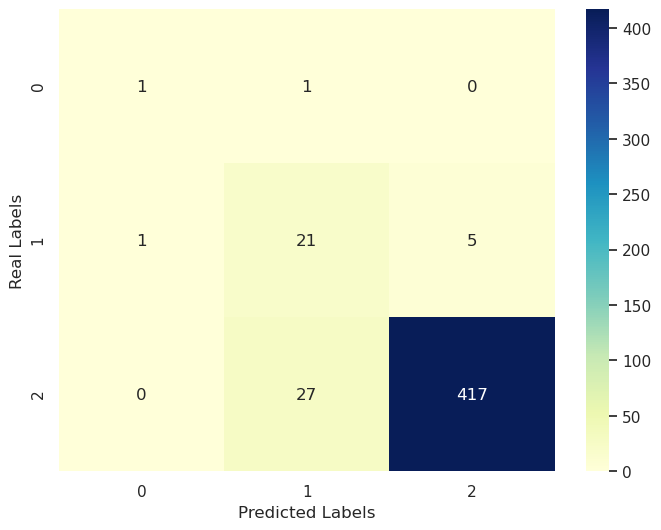

In [110]:
confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f', cmap='YlGnBu',  xticklabels=[0,1,2],  yticklabels=[0,1,2] )
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [111]:
# Hyperparameter tuning with Gridsearch

param_grid = {'n_neighbors' : [3,5,7,11,15,19], 'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan']}
folds=StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
grid = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy', n_jobs=-1)

In [112]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 11, 15, 19],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [113]:
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [114]:
y_test_pred = grid.predict(X_test_scaled)

In [115]:
accuracy_score(y_test, y_test_pred)

0.9302325581395349

In [116]:
recall_score(y_test, y_test_pred, average=None)

array([0.5       , 0.62962963, 0.95045045])

In [117]:
f1_score(y_test, y_test_pred, average=None)

array([0.5       , 0.50746269, 0.96457143])

In [118]:
best_knn = grid.best_estimator_

CART

In [119]:
from sklearn import tree

clasif_tree = tree.DecisionTreeClassifier()
clasif_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [120]:
y_test_pred = clasif_tree.predict(X_test_scaled)

In [121]:
accuracy_score(y_test, y_test_pred)

0.9365750528541226

In [122]:
recall_score(y_test, y_test_pred, average=None)

array([0.        , 0.66666667, 0.95720721])

In [123]:
f1_score(y_test, y_test_pred, average=None)

array([0.        , 0.55384615, 0.96810934])

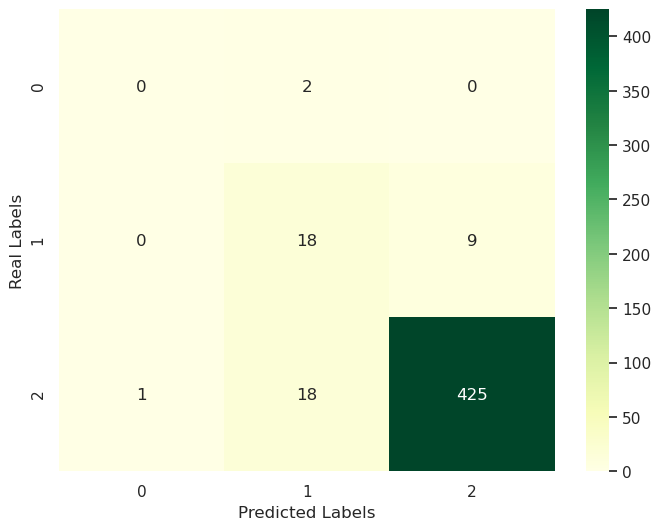

In [124]:
confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f', cmap='YlGn',  xticklabels=[0,1,2],  yticklabels=[0,1,2] )
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [125]:
# Hyperparameter tuning with Gridsearch

params_dt = {'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [0.02, 0.04, 0.06, 0.08], 'max_features': [0.2, 0.4,0.6, 0.8, 0.9, 1], 'criterion' : ['gini', 'entropy']}
folds=StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
grid = GridSearchCV(estimator=clasif_tree, param_grid=params_dt, scoring='accuracy', cv=folds, n_jobs=-1)

In [126]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 0.9, 1],
                         'min_samples_leaf': [0.02, 0.04, 0.06, 0.08]},
             scoring='accuracy')

In [127]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 0.9, 'min_samples_leaf': 0.02}


In [128]:
y_test_pred = grid.predict(X_test_scaled)

In [129]:
accuracy_score(y_test, y_test_pred)

0.8118393234672304

In [130]:
recall_score(y_test, y_test_pred, average=None)

array([0.        , 0.85185185, 0.81306306])

In [131]:
f1_score(y_test, y_test_pred, average=None)

array([0.        , 0.359375  , 0.89356436])

In [132]:
best_tree = grid.best_estimator_

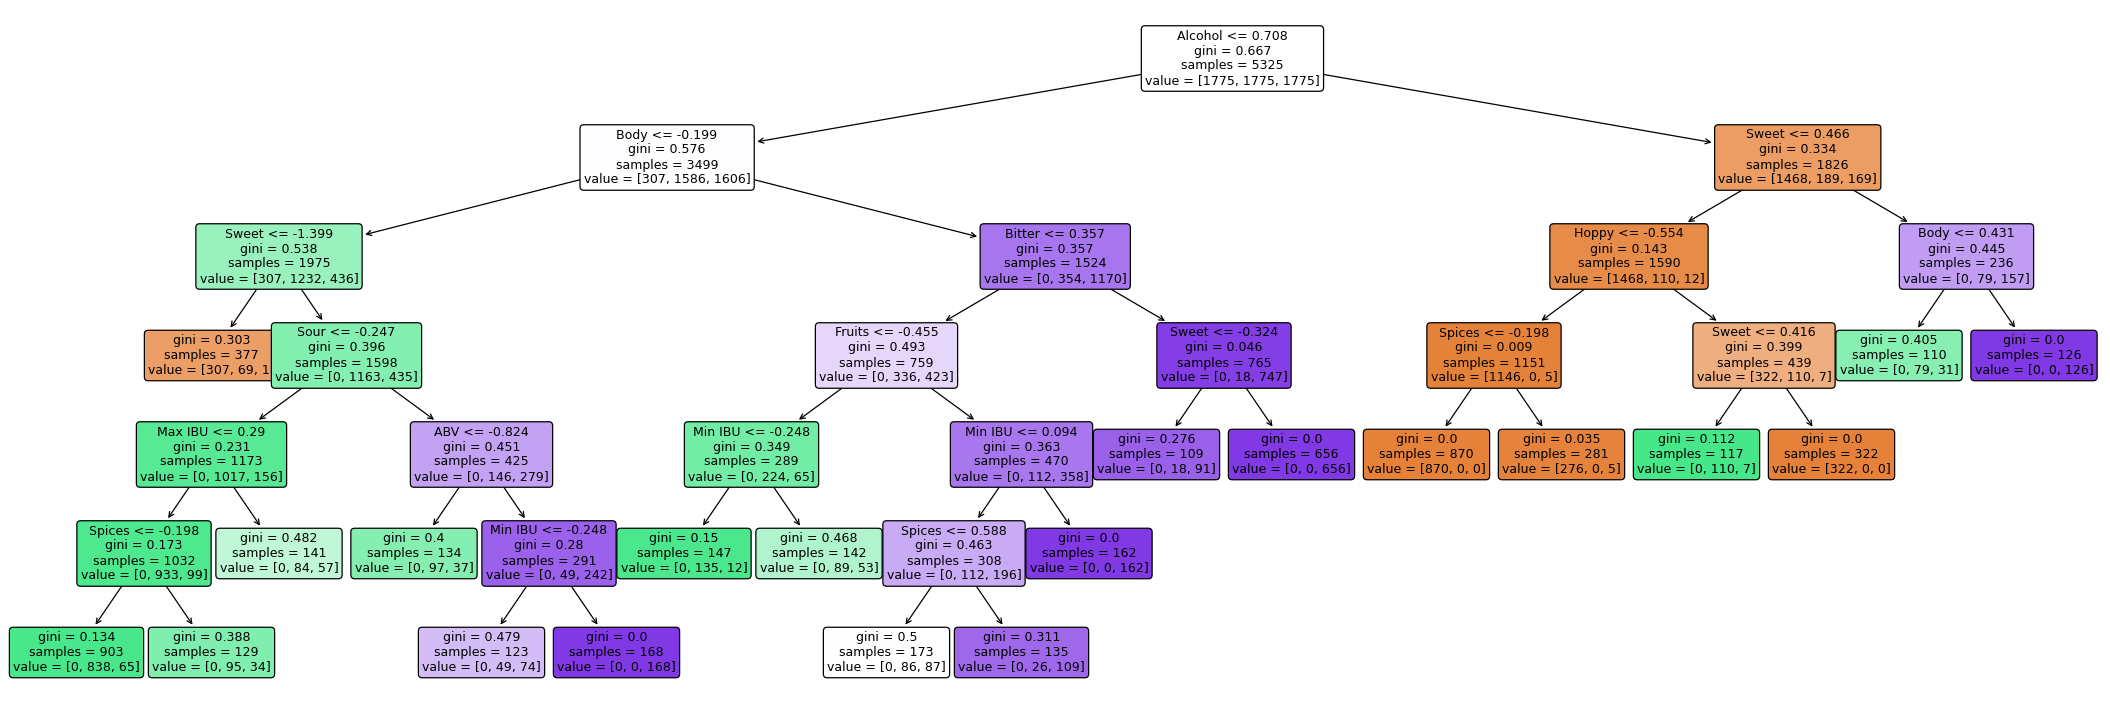

In [133]:
# We graph the tree obtained from the grid search to see its form

sns.reset_defaults()
plt.figure(figsize=(30,10), dpi= 90)
tree.plot_tree(best_tree, feature_names=X_test.columns[:-1], filled=True, rounded=True, fontsize=10)
plt.show()

print()

SVM Support Vector Machine

In [134]:
from sklearn.svm import SVC

svclassifier = SVC()
svclassifier.fit(X_train_scaled, y_train)

SVC()

In [135]:
y_pred_svm = svclassifier.predict(X_test_scaled)

In [136]:
accuracy_score(y_test, y_pred_svm)


0.9090909090909091

In [137]:
recall_score(y_test, y_pred_svm, average=None)

array([0.5       , 0.85185185, 0.91441441])

In [138]:
f1_score(y_test, y_pred_svm, average=None)

array([0.4       , 0.51685393, 0.95305164])

In [139]:
print(classification_report(y_test,y_pred_svm, zero_division=1))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.37      0.85      0.52        27
           2       1.00      0.91      0.95       444

    accuracy                           0.91       473
   macro avg       0.57      0.76      0.62       473
weighted avg       0.96      0.91      0.93       473



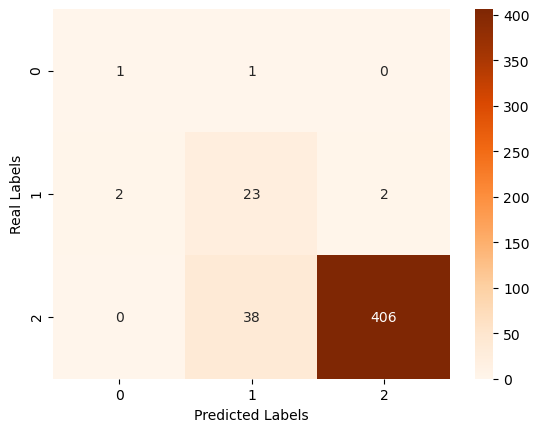

In [140]:
confusion_matrix(y_test, y_pred_svm)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='.0f', cmap='Oranges',  xticklabels=[0,1,2],  yticklabels=[0,1,2] )
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [141]:
# Hyperparameter tuning with Gridsearch

param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'poly']}
 

folds=StratifiedKFold(n_splits=5, random_state=10, shuffle=True)

grid = GridSearchCV(estimator=svclassifier, param_grid=param_grid, scoring='accuracy', cv=folds, n_jobs=-1)


grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy')

In [142]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [143]:
best_svm = grid.best_estimator_

## Model Ensemble

In [144]:
# We build an ensemble model with the best models used so far

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('LogisticRegression', logistic_regression_best), ('KNN', best_knn), ('SVM', best_svm)], voting='hard') #, ('CART', best_tree)
voting_clf.fit(X_train_scaled, y_train)
y_pred_ensemble = voting_clf.predict(X_test_scaled)


In [145]:
accuracy_score(y_test, y_pred_ensemble)

0.9386892177589852

In [146]:
recall_score(y_test, y_pred_ensemble, average=None)

array([0.5       , 0.62962963, 0.95945946])

In [147]:
f1_score(y_test, y_pred_ensemble, average=None)

array([0.4       , 0.53968254, 0.97038724])

In [148]:
target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, y_pred_ensemble, target_names=target_names, zero_division=1))

              precision    recall  f1-score   support

     class 0       0.33      0.50      0.40         2
     class 1       0.47      0.63      0.54        27
     class 2       0.98      0.96      0.97       444

    accuracy                           0.94       473
   macro avg       0.60      0.70      0.64       473
weighted avg       0.95      0.94      0.94       473



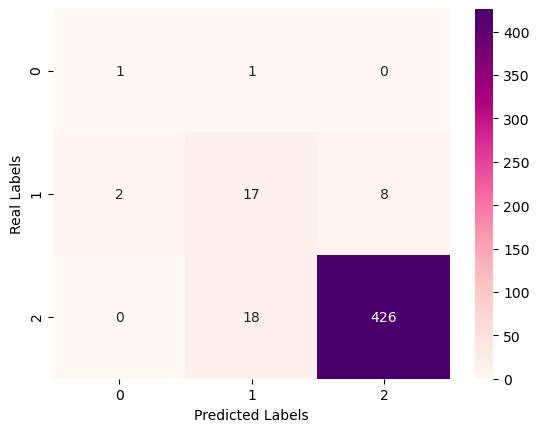

In [149]:
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='.0f', cmap='RdPu',  xticklabels=[0,1,2],  yticklabels=[0,1,2] )
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')
plt.show()

## Random Forest

In [150]:
# We use the Random Forest bagging ensemble

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1 , max_samples=0.8, random_state=42, oob_score=True)

rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_samples=0.8, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=42)

In [151]:
y_pred_randf = rf_clf.predict(X_test_scaled)

In [152]:
accuracy_score(y_test, y_pred_randf)

0.9556025369978859

In [153]:
recall_score(y_test, y_pred_randf, average=None)

array([0.5       , 0.66666667, 0.97522523])

In [154]:
f1_score(y_test, y_pred_randf, average=None)

array([0.66666667, 0.63157895, 0.97742664])

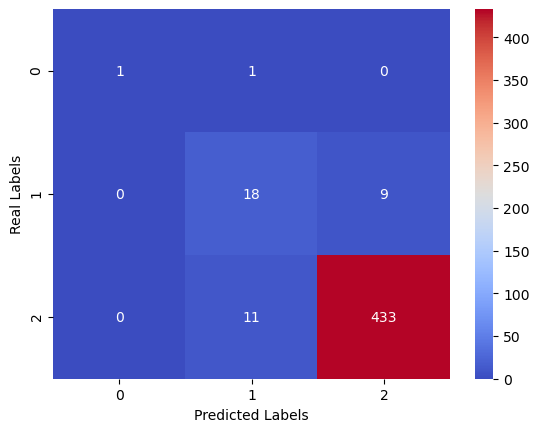

In [155]:
sns.heatmap(confusion_matrix(y_test, y_pred_randf), annot=True, fmt='.0f', cmap='coolwarm',  xticklabels=[0,1,2],  yticklabels=[0,1,2] )
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
# Hyperparameter tuning with Gridsearch

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}
 

folds=StratifiedKFold(n_splits=5, random_state=10, shuffle=True)

grid = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='accuracy', cv=folds, n_jobs=-1)


grid.fit(X_train_scaled, y_train)

In [157]:
print(grid.best_params_)

{'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [158]:
y_test_pred = grid.predict(X_test_scaled)

In [159]:
accuracy_score(y_test, y_test_pred)

0.9513742071881607

In [160]:
recall_score(y_test, y_test_pred, average=None)

array([0.5       , 0.66666667, 0.97072072])

In [161]:
f1_score(y_test, y_test_pred, average=None)

array([0.66666667, 0.61016949, 0.97511312])

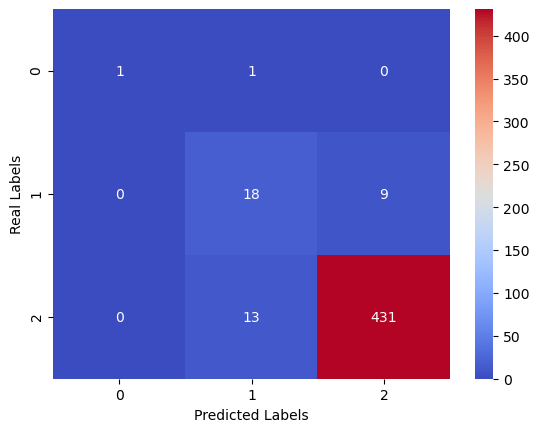

In [162]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f', cmap='coolwarm',  xticklabels=[0,1,2],  yticklabels=[0,1,2] )
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')
plt.show()

## XGBOOST

In [163]:
# We apply a boosting technique with XGBoost in which optimization is sequential

from xgboost import XGBClassifier

In [164]:
# We define the hyperparameters to be tuned by a grid search

params = {  
    "n_estimators": [50,100,500],      
    "max_depth": [1,2,3,4],            
    "learning_rate": [0.01, 0.1, 0.2]      
}

In [165]:
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [166]:
# We instantiate the XGBoost model

xgboost_model = XGBClassifier(n_jobs=-1, use_label_encoder=True, verbosity=0)

In [167]:
xg_grid = GridSearchCV(estimator= xgboost_model, param_grid=params, cv=cv)

In [168]:
xg_grid.fit(X_train_scaled, y_train)

/home/eduardo/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,

In [169]:
xg_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}

In [170]:
# We save the best estimator obtained from the grid

xg_best = xg_grid.best_estimator_

In [171]:
xg_best.fit(X_train_scaled, y_train)

/home/eduardo/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [172]:
y_pred_xg = xg_best.predict(X_test_scaled)

In [173]:
accuracy_score(y_test, y_pred_xg)

0.9471458773784355

In [174]:
recall_score(y_test, y_pred_xg, average=None)

array([0.5       , 0.62962963, 0.96846847])

In [175]:
f1_score(y_test, y_pred_xg, average=None)

array([0.66666667, 0.57627119, 0.97285068])

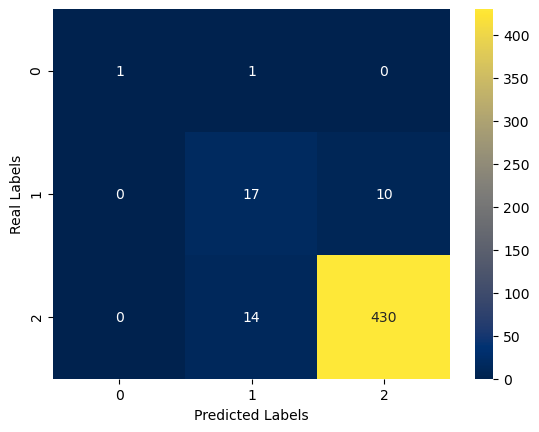

In [176]:
sns.heatmap(confusion_matrix(y_test, y_pred_xg), annot=True, fmt='.0f', cmap='cividis',  xticklabels=[0,1,2],  yticklabels=[0,1,2] )
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')
plt.show()

### Gradient Boosting

In [177]:
# We test another boosting model

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=1, random_state=5)

clf.fit(X_train_scaled, y_train)

clf.score(X_test_scaled, y_test)

0.9069767441860465

### LightGBM

In [178]:
# Here we will try another boosting model known for being as good as XGBoost but with less computing overhead

import lightgbm as lgb

model_LGB = lgb.LGBMClassifier(learning_rate=0.09, max_depth=3, random_state=42)

In [179]:
model_LGB.fit(X_train_scaled, y_train, verbose=1, eval_metric='logloss')

LGBMClassifier(learning_rate=0.09, max_depth=3, random_state=42)

In [180]:
y_pred_LGB = model_LGB.predict(X_test_scaled)

In [181]:
accuracy_score(y_test, y_pred_LGB)

0.9260042283298098

In [182]:
recall_score(y_test, y_pred_LGB, average=None)

array([0.5       , 0.74074074, 0.93918919])

In [183]:
f1_score(y_test, y_pred_LGB, average=None)

array([0.66666667, 0.53333333, 0.96082949])

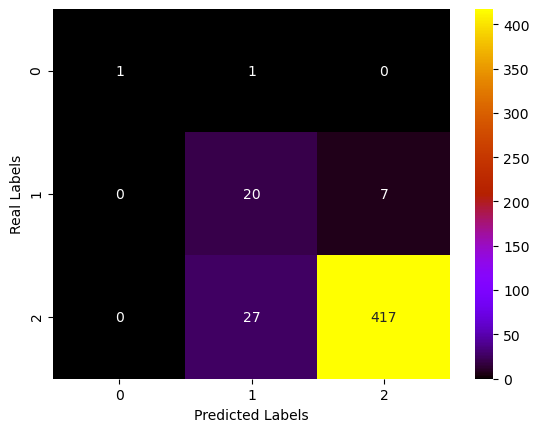

In [184]:
sns.heatmap(confusion_matrix(y_test, y_pred_LGB), annot=True, fmt='.0f', cmap='gnuplot',  xticklabels=[0,1,2],  yticklabels=[0,1,2] )
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [185]:
target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, y_pred_LGB, target_names=target_names, zero_division=1))

              precision    recall  f1-score   support

     class 0       1.00      0.50      0.67         2
     class 1       0.42      0.74      0.53        27
     class 2       0.98      0.94      0.96       444

    accuracy                           0.93       473
   macro avg       0.80      0.73      0.72       473
weighted avg       0.95      0.93      0.94       473



In [186]:
# We define the hyperparameters to be tuned by a grid search

param_grid = {
    'n_estimators': [300, 500],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [1,3,5,7],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

In [187]:
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

In [188]:
lgbm_grid = GridSearchCV(estimator= model_LGB, param_grid=param_grid, cv=cv)

In [189]:
lgbm_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=41, shuffle=True),
             estimator=LGBMClassifier(learning_rate=0.09, max_depth=3,
                                      random_state=42),
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'max_depth': [1, 3, 5, 7],
                         'min_split_gain': [0.3, 0.4],
                         'n_estimators': [300, 500],
                         'num_leaves': [50, 100, 200],
                         'reg_alpha': [1.1, 1.2, 1.3],
                         'reg_lambda': [1.1, 1.2, 1.3],
                         'subsample': [0.7, 0.8, 0.9], 'subsample_freq': [20]})

In [190]:
lgbm_grid.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 7,
 'min_split_gain': 0.3,
 'n_estimators': 300,
 'num_leaves': 50,
 'reg_alpha': 1.1,
 'reg_lambda': 1.3,
 'subsample': 0.9,
 'subsample_freq': 20}

In [191]:
lgbm_best = lgbm_grid.best_estimator_

In [192]:
lgbm_best.fit(X_train_scaled, y_train)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.09, max_depth=7,
               min_split_gain=0.3, n_estimators=300, num_leaves=50,
               random_state=42, reg_alpha=1.1, reg_lambda=1.3, subsample=0.9,
               subsample_freq=20)

In [193]:
y_pred_lgbm_best = lgbm_best.predict(X_test_scaled)

In [194]:
accuracy_score(y_test, y_pred_lgbm_best)

0.9386892177589852

In [195]:
recall_score(y_test, y_pred_lgbm_best, average=None)

array([0.5       , 0.7037037 , 0.95495495])

In [196]:
f1_score(y_test, y_pred_lgbm_best, average=None)

array([0.66666667, 0.56716418, 0.96803653])

In [197]:
target_names = ['class 0','class 1','class 2']
print(classification_report(y_test, y_pred_lgbm_best, target_names=target_names, zero_division=1))

              precision    recall  f1-score   support

     class 0       1.00      0.50      0.67         2
     class 1       0.47      0.70      0.57        27
     class 2       0.98      0.95      0.97       444

    accuracy                           0.94       473
   macro avg       0.82      0.72      0.73       473
weighted avg       0.95      0.94      0.94       473



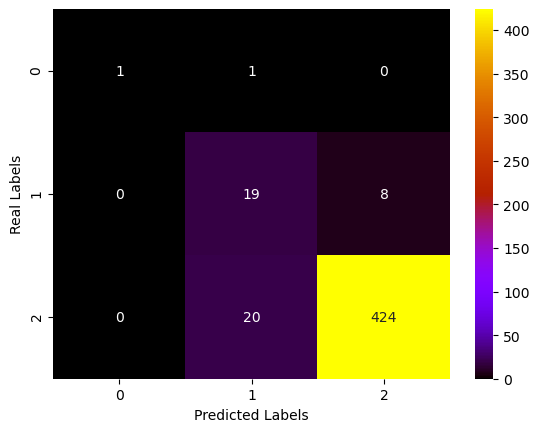

In [198]:
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm_best), annot=True, fmt='.0f', cmap='gnuplot',  xticklabels=[0,1,2],  yticklabels=[0,1,2] )
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')
plt.show()

* ## Pipeline

In [199]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold #Vuelvo a importar aquí para poder correr sólo el pipeline

steps = [('preprocesamiento', MinMaxScaler()), ('clasificador', XGBClassifier(n_estimators=500, max_depth=2, learning_rate=0.2, n_jobs=-1, verbosity=0, silent=1, use_label_encoder=False))]

pipe=Pipeline(steps)

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)



In [200]:
from sklearn.model_selection import GridSearchCV #Vuelvo a importar aquí para poder correr sólo el pipeline

param_grid = [{'preprocesamiento':[StandardScaler(), MinMaxScaler(), None], 'clasificador__n_estimators': range(100, 501, 100), 'clasificador__learning_rate': [0.1, 0.15, 0.175, 0.2, 0.225, 0.25], 'clasificador__max_depth': [2,4,6]}]

grid=GridSearchCV(pipe, param_grid, cv=folds, verbose=0)

grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento', MinMaxScaler()),
                                       ('clasificador',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=...
                                                      reg_lambda=None,
                                    

In [201]:
grid.best_estimator_

Pipeline(steps=[('preprocesamiento', StandardScaler()),
                ('clasificador',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.25,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=500,
                               n_jobs=-1, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               silent=1, subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_paramete

In [202]:
grid.best_params_

{'clasificador__learning_rate': 0.25,
 'clasificador__max_depth': 6,
 'clasificador__n_estimators': 500,
 'preprocesamiento': StandardScaler()}

In [203]:
#Testing Score

grid.best_estimator_.score(X_test,y_test)

0.9471458773784355

* ## Feature Importance

In [204]:
# We analize the relative importance of the features from the best decission tree obtained from the grid search.
# This will give us a bit of insight about what is determining a certain score.

importancia_features = pd.DataFrame(best_tree.feature_importances_, index = X.columns, columns=['Importance'])
importancia_features_sort = importancia_features.sort_values('Importance', ascending=False)
importancia_features_sort[0:10]

Importance
Alcohol    0.333348
Sweet      0.274592
Body       0.169884
Sour       0.061726
Bitter     0.048332
Fruits     0.037232
Min IBU    0.022708
ABV        0.020442
Hoppy      0.015104
Max IBU    0.008515

In [205]:
# Here we will take a look at the feature importance obtained from our Random Forest ensemble

if_select = pd.DataFrame({'Attribute':X_train.columns, 'Importance': rf_clf.feature_importances_})
features = if_select.sort_values('Importance', ascending = False).iloc[0:10, :]['Attribute'].values.tolist()
features

['ABV',
 'Alcohol',
 'Fruits',
 'Bitter',
 'Spices',
 'Min IBU',
 'Malty',
 'Sweet',
 'Hoppy',
 'Body']

* Feature importance using LIME

We will choose a random instance of the Test split and explain the reasons for its prediction 

In [206]:
X_lime = X[features] 

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X_lime, y, test_size=0.3, random_state = 123)
rc_exp = RandomForestClassifier(n_estimators=50, random_state = 123)
rc_exp.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=123)

In [208]:
# We explain an instance of classification using LIME Library

from lime.lime_tabular import LimeTabularExplainer

X_train_explainer = np.array(X_train)
X_test_explainer = np.array(X_test)
explainer = LimeTabularExplainer(X_train_explainer, 
                                 mode = "classification",
                                 training_labels = y_train,
                                 feature_names = X_train.columns, 
                                 categorical_features  = list(range(7)), 
                                 discretize_continuous=False)

In [209]:
import random

data_row = random.choice(X_test_explainer)
explanation = explainer.explain_instance(data_row, rc_exp.predict_proba, top_labels=4)

In [210]:
explanation.show_in_notebook(show_table=True)

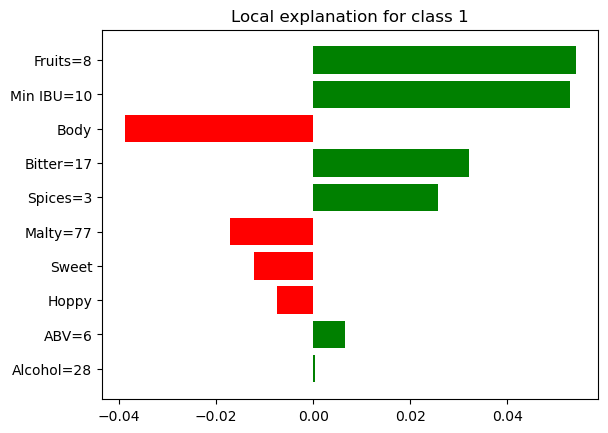

In [211]:
explanation.as_pyplot_figure()

* ## Model deployment preparation - Pickle/Shelve

In [212]:
import shelve

stored = shelve.open("best_model.db")
stored["best_model"] = xg_best
stored.close()

In [213]:
# To recover the saved model we run this cell

stored = shelve.open("best_model.db")
xg_best_to_deploy = stored["best_model"]

In [214]:
# This is the saved model ready for deployment

xg_best_to_deploy

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)